# タイタニックの乗客データを使った生存者推定モデルの生成

参考サイト [PyData.Tokyo Tutorial & Hackathon #1](https://github.com/PyDataTokyo/pydata-tokyo-tutorial-1)

## 1-1. データの読み込み

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("data/train.csv", encoding="utf-8")

65歳の人の名前を出す

In [3]:
df[df.Age == 65][['Name', 'Age']]

,Name,Age
54,"Ostby, Mr. Engelhart Cornelius",65.0
280,"Duane, Mr. Frank",65.0
456,"Millet, Mr. Francis Davis",65.0


- PassengerId: 乗客ID
- Survived: 1 = 生き残り 0 = 死亡
- Pclass: 等級
- Name: 名前
- Sex: 性別
- Age: 年齢
- Parch: 子供の数
- Ticket: チケット番号
- Fare: 運賃
- Cabin: 部屋番号
- Embarked: 乗船地

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


先頭のデータ

In [5]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


お尻のデータ

In [6]:
df.tail(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
df[['Name', 'Age', 'Sex']].head(3)

,Name,Age,Sex
0,"Braund, Mr. Owen Harris",22.0,male
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,female
2,"Heikkinen, Miss. Laina",26.0,female


## 1-2. 集計

describe()関数を利用すると、データフレームの概要を把握することが出来ます。
- count: レコード数です。
- mean: 平均値です。
- std: 標準偏差です。
- min: 最小値です。
- 25%, 50%, 75%: 第1四分位, 中央値、第3四分位です。
- max: 最大値です。

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
max_age = df['Age'].max()
print('年齢の最大値: {0}'.format(max_age))

mean_age = df['Age'].mean()
print('年齢の平均値: {0}'.format(mean_age))


年齢の最大値: 80.0
年齢の平均値: 29.69911764705882


年齢の高い上位10名を確認してみましょう。

In [10]:
df[['Name', 'Sex', 'Age']].sort_values(by='Age', ascending=0).head(10)

,Name,Sex,Age
630,"Barkworth, Mr. Algernon Henry Wilson",male,80.0
851,"Svensson, Mr. Johan",male,74.0
493,"Artagaveytia, Mr. Ramon",male,71.0
96,"Goldschmidt, Mr. George B",male,71.0
116,"Connors, Mr. Patrick",male,70.5
672,"Mitchell, Mr. Henry Michael",male,70.0
745,"Crosby, Capt. Edward Gifford",male,70.0
33,"Wheadon, Mr. Edward H",male,66.0
54,"Ostby, Mr. Engelhart Cornelius",male,65.0
280,"Duane, Mr. Frank",male,65.0


女性に絞る

In [11]:
df[df.Sex=='female'][['Name', 'Sex', 'Age']].sort_values(by='Age', ascending=0).head(10)

,Name,Sex,Age
483,"Turkula, Mrs. (Hedwig)",female,63.0
275,"Andrews, Miss. Kornelia Theodosia",female,63.0
829,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0
366,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0
268,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.0
195,"Lurette, Miss. Elise",female,58.0
11,"Bonnell, Miss. Elizabeth",female,58.0
772,"Mack, Mrs. (Mary)",female,57.0
879,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0
15,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0


## 1-3. データの前処理

### 不要カラムの削除

Cabin（部屋番号）などの値には多くの欠損データが含まれています。
Cabinがnullのデータ数を調べる

In [12]:
df['Cabin'].isnull().sum()

687

Ticket（チケット番号）は、今回の分析では有用とは考えられません。

In [13]:
df[['Name', 'Ticket']].head()

,Name,Ticket
0,"Braund, Mr. Owen Harris",A/5 21171
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599
2,"Heikkinen, Miss. Laina",STON/O2. 3101282
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803
4,"Allen, Mr. William Henry",373450


CabinとTicketのカラムを削除

In [14]:
df = df.drop(['Ticket', 'Cabin'], axis=1)

In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


### 欠損値の補間

データフレーム中に、NaN という値があります。これが今回の欠損値です。

In [16]:
df.loc[4:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,16.7000,S


- ↑AgeにNaNがあるデータの例
- df.loc[4:10]は４番目から１０番目の行を表示

In [17]:
df.loc[4:6][['Name', 'Age']].interpolate()

,Name,Age
4,"Allen, Mr. William Henry",35.0
5,"Moran, Mr. James",44.5
6,"McCarthy, Mr. Timothy J",54.0


Pandasには データの補間 を行うための interpolate()関数が存在します。

In [18]:
female_age_mean = round(df[df.Sex=='female']['Age'].mean())
male_age_mean = round(df[df.Sex=='male']['Age'].mean())

print('女性の平均年齢は{0}歳、男性は{1}歳です。この平均年齢で補間します。'.format(female_age_mean, male_age_mean))

# df = pd.read_csv("data/train.csv")

df[df.PassengerId==20][['PassengerId', 'Name', 'Sex', 'Age']]

女性の平均年齢は28.0歳、男性は31.0歳です。この平均年齢で補間します。


,PassengerId,Name,Sex,Age
19,20,"Masselmani, Mrs. Fatima",female,NaN


In [19]:
df.loc[18:22]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,18.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,7.2250,C
20,21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,26.0000,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,13.0000,S
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,8.0292,Q


In [20]:
round(df[df.Sex=='male']['Age'].mean())

31.0

In [21]:
df[df.PassengerId==6][['PassengerId', 'Name', 'Sex', 'Age']]

,PassengerId,Name,Sex,Age
5,6,"Moran, Mr. James",male,NaN


In [22]:
dff = df[df.Sex=='female'].fillna({'Age': female_age_mean})
dfm = df[df.Sex=='male'].fillna({'Age': male_age_mean})

df2 = dff.append(dfm)

In [23]:
df2[df2.PassengerId==6][['PassengerId', 'Name', 'Sex', 'Age']]

,PassengerId,Name,Sex,Age
5,6,"Moran, Mr. James",male,31.0


## カラムの追加
データフレームにカラムを追加します。
年齢で分類し、数値をふってみましょう。

In [24]:
def classification_age(age):
    if age <= 19:
        return '1'
    elif age <= 34:
        return '2'
    elif age <= 49:
        return '3'
    elif age >= 50:
        return '4'    
    else:
        return '0'

# lambdaを利用
# df['AgeClass'] = df.Age.map(lambda x: 0 if x >= 50 else 1)
        
df['AgeClass'] = df.Age.map(classification_age)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,3


## 1-4. データの可視化
0 = 死亡, 1 = 生存という２つの軸でテータを見てみます。

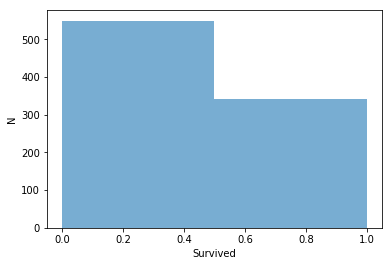

In [25]:
# df['Survived'].hist(alpha=0.5, bins=2)

df['Survived'].plot(alpha=0.6, kind='hist', bins=2)
plt.xlabel('Survived')
plt.ylabel('N')

男性 / 女性の軸を加えてデータを見てみましょう。

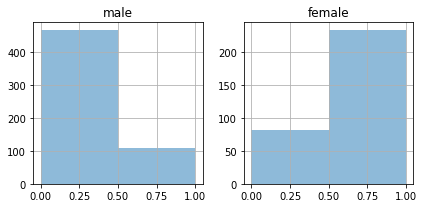

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))

#i = 0
#for sex in ['male', 'female']:
#   df['Survived'][df.Sex==sex].hist(alpha=0.5, bins=2, ax=axes[i])
#    axes[i].set_title(sex)
#
#    i =+ 1
for i, sex in enumerate(['male', 'female']):
    df['Survived'][df.Sex==sex].hist(alpha=0.5, bins=2, ax=axes[i])
    axes[i].set_title(sex)  
#plt.xlabel('Survived')    
#plt.ylabel('N')

# plt.subplots_adjust(wspace=0.5, hspace=0.5)
fig.subplots_adjust(hspace=0.3)
fig.tight_layout()

男性よりも、女性のほうが生存率が高いことが分かります。ここに年齢を軸に加えます。

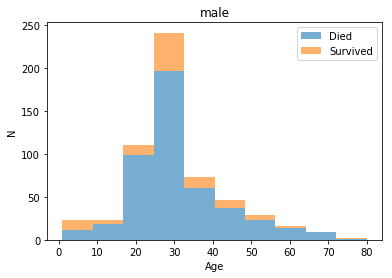

In [27]:
plt.hist([df2[(df2.Survived==0) & (df2.Sex=='male')]['Age'],
          df2[(df2.Survived==1) & (df2.Sex=='male')]['Age']],
          alpha=0.6, range=(1,80), bins=10, stacked=True,
          label=('Died', 'Survived'))
plt.legend()
plt.xlabel('Age')
plt.ylabel('N')
plt.title('male')

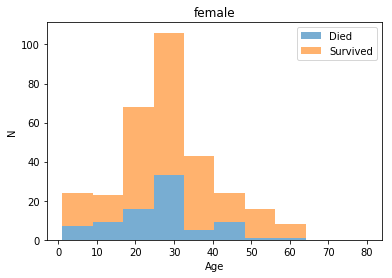

In [28]:
plt.hist([df2[(df2.Survived==0) & (df2.Sex=='female')]['Age'],
          df2[(df2.Survived==1) & (df2.Sex=='female')]['Age']],
          alpha=0.6, range=(1,80), bins=10, stacked=True,
          label=('Died', 'Survived'))
plt.legend()
plt.xlabel('Age')
plt.ylabel('N')
plt.title('female')

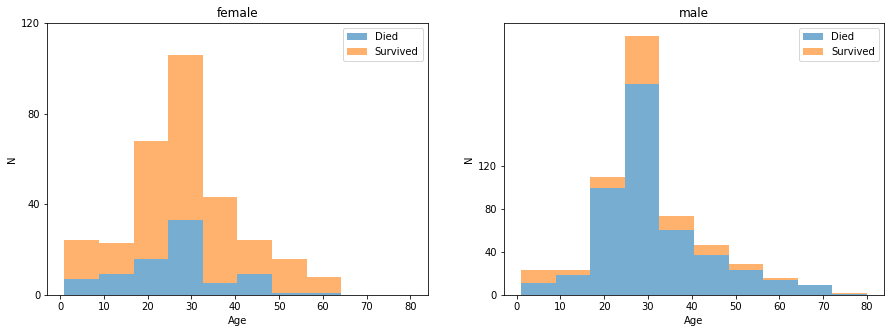

total 936
drwxr-xr-x  10 okusama27  staff     340 Jan 24 20:18 .
drwxr-xr-x   6 okusama27  staff     204 Jan 24 18:35 ..
drwxr-xr-x   4 okusama27  staff     136 Jan 24 19:44 .ipynb_checkpoints
-rw-r--r--   1 okusama27  staff     454 Jan 24 18:46 README.md
drwxr-xr-x   9 okusama27  staff     306 Jan 24 18:51 data
drwxr-xr-x   8 okusama27  staff     272 Jan 24 18:46 env
-rw-r--r--   1 okusama27  staff    2839 Jan 24 20:18 kaggle_gendermodel.csv
-rw-r--r--   1 okusama27  staff    1205 Jan 24 20:24 out.png
-rw-r--r--   1 okusama27  staff  219394 Jan 24 19:43 タイタニックの乗客データを使った生存者推定モデルの生成.ipynb
-rw-r--r--   1 okusama27  staff  242879 Jan 24 20:18 タイタニックの乗客データを使った生存者推定モデルの生成2.ipynb


In [29]:
fig = plt.figure(figsize=[15, 5])

ax1 = fig.add_subplot(121)

plt.hist([df2[(df2.Survived==0) & (df2.Sex=='female')]['Age'],
          df2[(df2.Survived==1) & (df2.Sex=='female')]['Age']],
          alpha=0.6, range=(1,80), bins=10, stacked=True,
          label=('Died', 'Survived'))

plt.xlabel('Age')
plt.yticks([0, 40, 80, 120])
plt.ylabel('N')
plt.title('female')
plt.legend()

ax2 = fig.add_subplot(122)

plt.hist([df2[(df2.Survived==0) & (df2.Sex=='male')]['Age'],
          df2[(df2.Survived==1) & (df2.Sex=='male')]['Age']],
          alpha=0.6, range=(1,80), bins=10, stacked=True,
          label=('Died', 'Survived'))

plt.xlabel('Age')
plt.yticks([0, 40, 80, 120])
plt.ylabel('N')
plt.title('male')
plt.legend()

plt.show()
plt.savefig('out.png')

!ls -al

最後に、Pclass（等級）の軸も加えて可視化してみましょう。


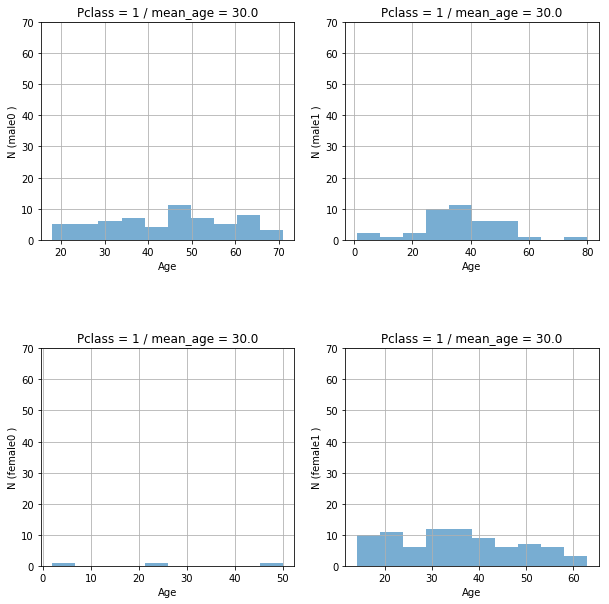

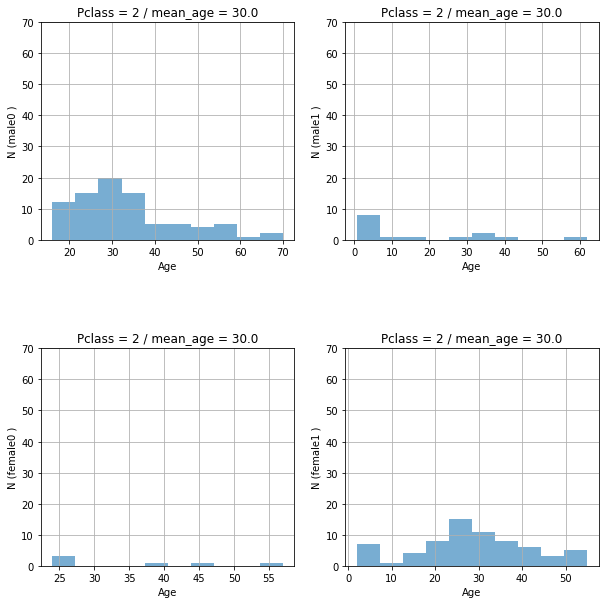

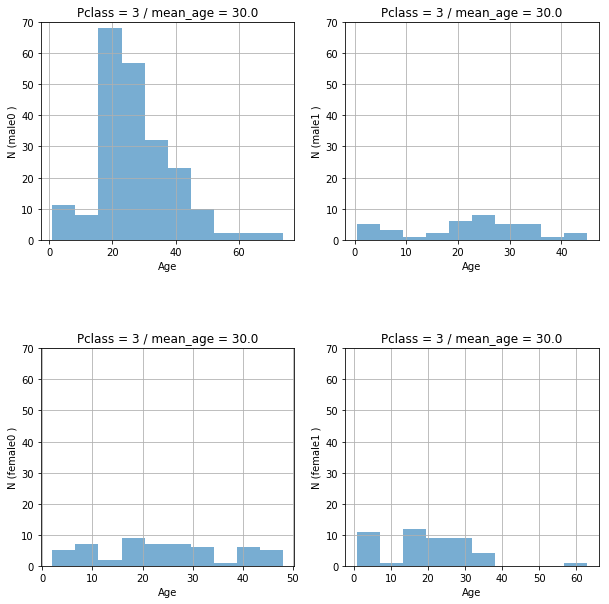

In [30]:
mean_age = df['Age'].mean()

for pclass in [1, 2, 3]:
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=[10, 10])

    sex_n=0
    for sex in ['male', 'female']:
        for survived in [0, 1]:
                fig = df[((df.Survived==survived) & (df.Sex==sex) & (df.Pclass==pclass) )].Age.hist(alpha=0.6, bins=10, ax=axes[sex_n][survived])
                fig.set_xlabel("Age")    
                fig.set_ylabel('N ('+sex+str(survived)+' )')  
                axes[sex_n][survived].set_ylim(0,70)
                fig.set_title('Pclass = {0} / mean_age = {1}'.format(pclass, round(mean_age)))
                
        sex_n += 1
    plt.subplots_adjust(hspace=0.5)
    plt.show()
